<a href="https://colab.research.google.com/github/shahzadahmad3/Natural-Language-Processing/blob/main/Advance_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic CNNs struggle with:**
1.   Vanishing gradients – Training deep networks becomes difficult.
2.   Overfitting – Too many parameters lead to poor generalization.
3.   Computational cost – More layers mean longer training times

👉 Solution? **Advanced CNN architecture**s that introduce new techniques to handle these challenges.
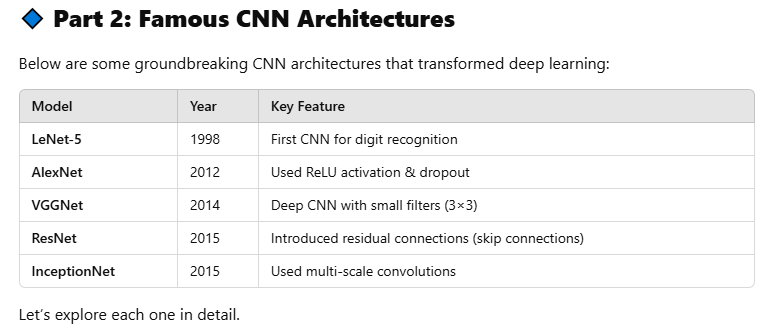


**LeNet-5** was developed by **Yann LeCun** for handwritten digit recognition (MNIST dataset). It was first CNN

LeNet-5 Architecture
Input: 32×32 grayscale image
**Feature Extraction:**
1.   Conv1 (6 filters, 5×5 kernel, ReLU)
2.   Pooling1 (2×2, average pooling)
3.   Conv2 (16 filters, 5×5 kernel, ReLU)
4.   Pooling2 (2×2, average pooling)
**Fully Connected Layers:**
5.   Dense(120 neurons, ReLU)
6.   Dense(84 neurons, ReLU)
7.   Dense(10 neurons, Softmax for classification)



In [12]:
import tensorflow as tf
from tensorflow import keras

# Define the LeNet-5 Model
model = keras.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)),
    keras.layers.AveragePooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'),
    keras.layers.AveragePooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
# Key Takeaways:
# ✅ First CNN model for handwritten digit recognition.
# ✅ Used average pooling instead of max pooling.
# ✅ Has low parameter count, making it lightweight.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_8                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_9                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

**AlexNet (2012) – Deep CNN Revolution**

AlexNet, created by Alex Krizhevsky, won the 2012 ImageNet Challenge with top-5 error rate of 15.3% (compared to 26% of traditional models).

**AlexNet Key Innovations**
*   **ReLU Activation** – Faster training than sigmoid/tanh.
*   **Dropout Layers** – Prevents overfitting.
*   **Data Augmentation** – Improves generalization.
*   **GPU Training** – Used parallel processing for speed.

AlexNet Architecture
*   **Input:** 227×227 RGB image
*   **Feature Extraction:**
1.   Conv1 (96 filters, 11×11 kernel, ReLU)
2.   MaxPooling1 (3×3, stride=2)
3.   Conv2 (256 filters, 5×5 kernel, ReLU)
4.   MaxPooling2 (3×3, stride=2)
5.   Conv3 (384 filters, 3×3 kernel, ReLU)
6.   Conv4 (384 filters, 3×3 kernel, ReLU)
7.   Conv5 (256 filters, 3×3 kernel, ReLU)
8.   MaxPooling3 (3×3, stride=2)
*    Fully Connected Layers:
9.   Dense(4096 neurons, ReLU, Dropout)
10.   Dense(4096 neurons, ReLU, Dropout)
11.   Dense(1000 neurons, Softmax for classification)

👉 Why is AlexNet Important?


*   First deep CNN to outperform traditional computer vision techniques.
*   Increased depth (8 layers) improved accuracy.
*   Dropout Regularization reduced overfitting.

**VGGNet** was introduced by Visual Geometry Group (VGG) and improved CNN performance by using very deep networks (16-19 layers).

**VGG Architecture**
*   Uses only 3×3 convolution kernels.
*   Increases depth to capture complex features.
*   Uses max pooling for downsampling.

👉 Key Idea: Stack multiple 3×3 convolutions instead of large filters to improve feature learning.


In [15]:
#VGG-16 Implementation
from tensorflow.keras.applications import VGG16
vgg_model=keras.Sequential([
    VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
])
vgg_model.summary()
# 👉 Why VGG?
# ✅ Simple and effective.
# ✅ Used in many transfer learning applications.

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Deeper networks often suffer from **vanishing gradients**. **ResNet (2015)** introduced **skip connections(Residual Learning)** to solve this issue.

**ResNet Key Idea – Residual Learning**

Instead of learning raw functions, ResNet learns residuals:
H(x) = F(x) + x

Where: H(x) is desired mapping,
F(x) is a small network (residual block) and x is the input

👉 Why skip connections?
*   Makes deep networks easier to train.
*   Allows gradients to flow smoothly.
*   Enables very deep networks (ResNet-50, ResNet-101, ResNet-152).

In [16]:
from tensorflow.keras.applications import ResNet50
resnet_model=keras.Sequential([
    ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
])
resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)